In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from htrace import Parse
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
%config InlineBackend.figure_formats = ['svg']
# sns.set_style("whitegrid")

from util import merge_info

In [2]:
data_path={
    'dfsioe_r': 'data/dfsioe_r/',
    'dfsioe_w': 'data/dfsioe_w/',
    'kmeans': 'data/kmeans/',
    'pagerank': 'data/pagerank/',
    'terasort': 'data/terasort/',
    'wordcount': 'data/wordcount/'
}
samplers = ['a', 'l', 't', 'p0.01', 'p0.1']

## 不同bench的采样器采样指标(图)

In [59]:
def draw_chart(test):
    fig, axes = plt.subplots(2, 3, figsize = (12, 8))
    node = sns.barplot(x=test.index, y=test.node, ax=axes[0,0])
    node.set(xlabel='Function Type',ylabel='kind of function')
    
    
    
    tree = sns.barplot(x=test.index, y=test.tree, ax=axes[0,1])
    tree.set(xlabel='Trace Tree Type',ylabel='kind of trace tree')
    en = sns.barplot(x=test.index, y=test.en, ax=axes[0,2])
    en.set(xlabel='Information Entropy',ylabel='information entropy')
    dist = sns.barplot(x=test.index, y=test.dist, ax=axes[1,0])
    dist.set(xlabel='Similarity',ylabel='euclidean distance')
    time = sns.barplot(x=test.index, y=test.time, ax=axes[1,1])
    time.set(xlabel='Execution Time',ylabel='time(s)')
    test['size'] = [0]+test['size'].tolist()[1:]
    i = ['']+test.index.tolist()[1:]
    size = sns.barplot(x=i, y=test['size'], ax=axes[1,2])
    size.set(xlabel='Trace File Size',ylabel='trace file size(MB)')
    plt.subplots_adjust(wspace=0.3, hspace=0.2)

In [70]:
sns.set(style="whitegrid")

### dfsioe_r

+----------------+--------+------------+
|     bench      |  时间  |   吞吐量   |
+----------------+--------+------------+
| data/dfsioe_r/ | 19.378 | 17412232.0 |
+----------------+--------+------------+


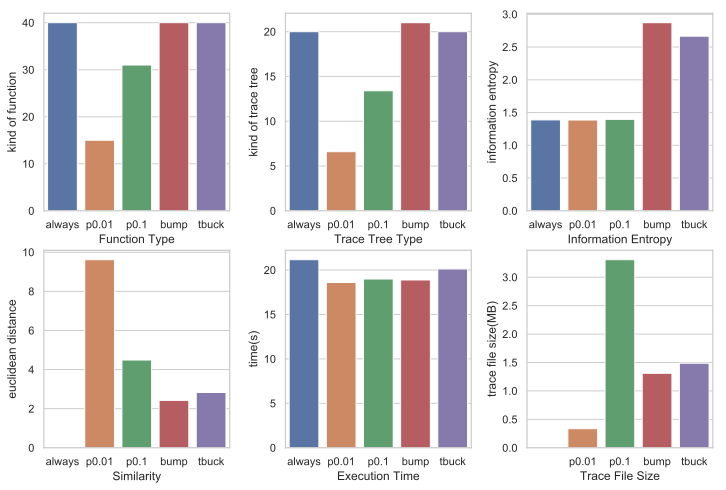

In [71]:
dfsioe_r = merge_info('data/dfsioe_r/', samplers)
draw_chart(dfsioe_r)

### dfsioe_w

+----------------+--------+------------+
|     bench      |  时间  |   吞吐量   |
+----------------+--------+------------+
| data/dfsioe_w/ | 21.193 | 16009898.0 |
+----------------+--------+------------+


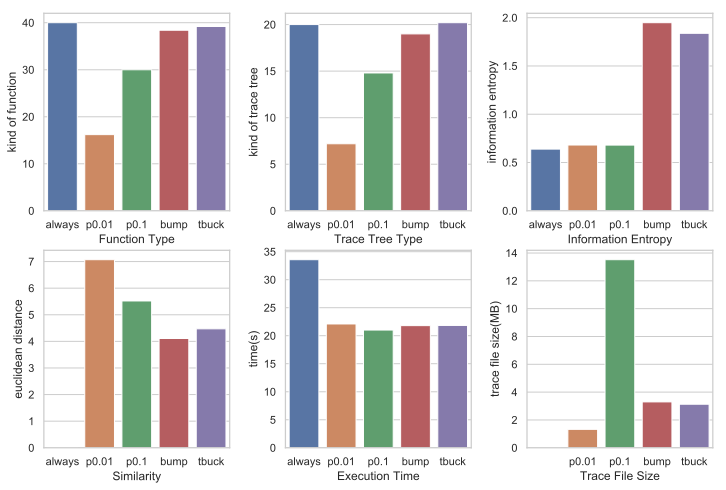

In [63]:
dfsioe_w = merge_info('data/dfsioe_w/', samplers)
draw_chart(dfsioe_w)

### kmeans

+--------------+--------+---------+
|    bench     |  时间  |  吞吐量 |
+--------------+--------+---------+
| data/kmeans/ | 26.016 | 53667.0 |
+--------------+--------+---------+


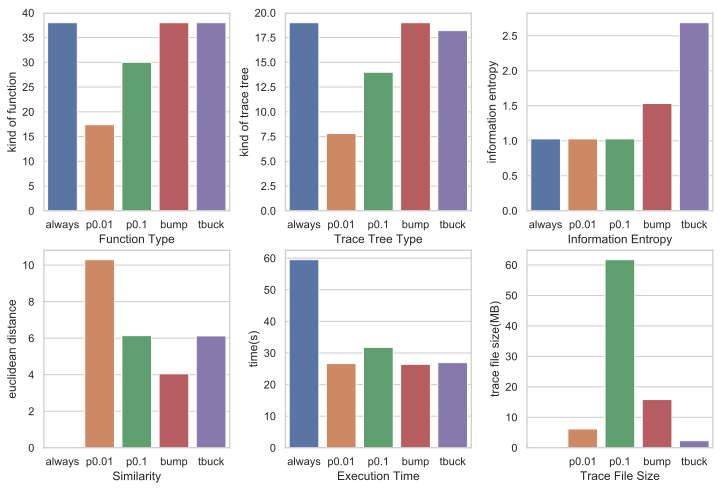

In [64]:
kmeans = merge_info('data/kmeans/', samplers)
draw_chart(kmeans)

### pagerank

+----------------+--------+----------+
|     bench      |  时间  |  吞吐量  |
+----------------+--------+----------+
| data/pagerank/ | 151.24 | 145783.0 |
+----------------+--------+----------+


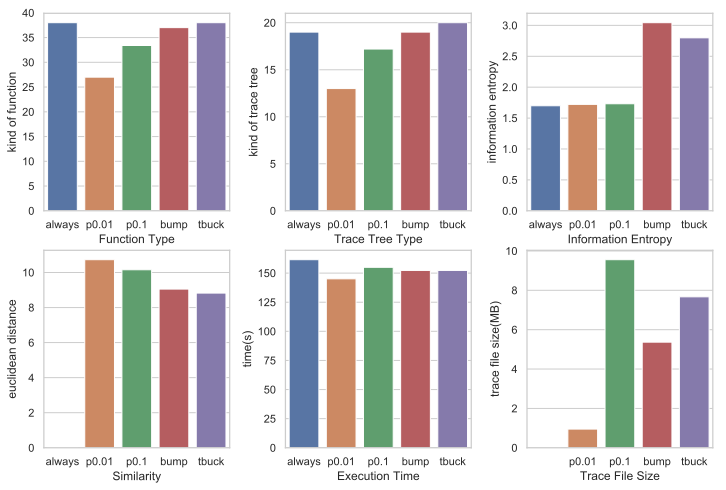

In [65]:
pagerank = merge_info('data/pagerank/', samplers)
draw_chart(pagerank)

### terasort

+----------------+--------+-----------+
|     bench      |  时间  |   吞吐量  |
+----------------+--------+-----------+
| data/terasort/ | 11.273 | 2838641.0 |
+----------------+--------+-----------+


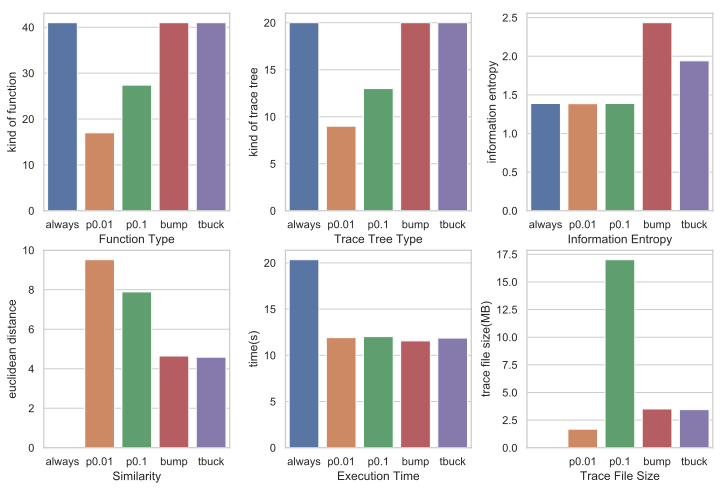

In [66]:
terasort = merge_info('data/terasort/', samplers)
draw_chart(terasort)

### wordcount

+-----------------+--------+----------+
|      bench      |  时间  |  吞吐量  |
+-----------------+--------+----------+
| data/wordcount/ | 9.2376 | 891362.4 |
+-----------------+--------+----------+


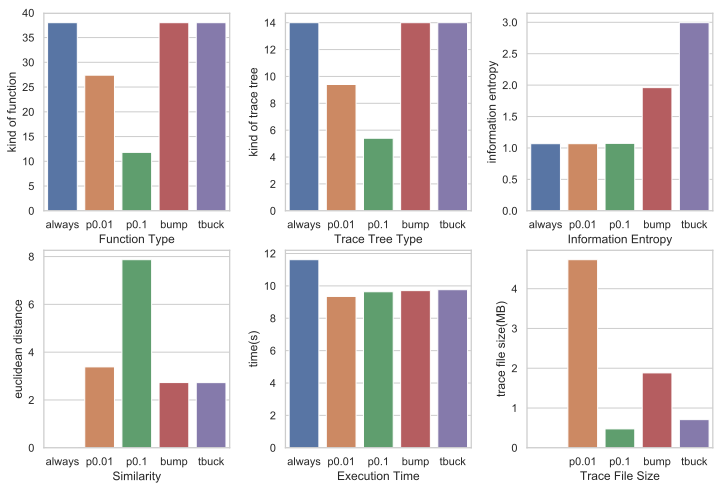

In [67]:
wordcount = merge_info('data/wordcount/', samplers)
draw_chart(wordcount)